# Quantum Teleportation Protocol 

The main goal of this notebook is to explain the quantum teleportation protocol. This protocol is one of the most important quantum algorithms, and it is the foundation of many other quantum algorithms.

Quantum teleportation is a process by which a quantum state can be transmitted from one location to another, with the help of two classical bits and a Bell pair of entangled qubits. The quantum state to be teleported is destroyed in the process, and it is reconstituted at the receiving location.

The protocol consists of the following steps:

1. Alice and Bob share an entangled pair of qubits.
2. Alice applies a CNOT gate and a Hadamard gate to her qubit, and then measures both qubits.
3. Alice sends the measurement results to Bob using two classical bits.
4. Bob applies some gates to his qubit depending on the measurement results.

The quantum teleportation protocol is a fundamental building block for many quantum algorithms, and it is a key component of quantum error correction codes.

In the following sections, we will explain the protocol in detail and provide a simple implementation using Qiskit.

### Section 1: creating the entangled pair

We will create Bell pair of qubits using the following circuit:
    
    ``` 

    q_0: |0> --H--@
                  |
    q_1: |0> -----X--

    ``` 


    To exploit full power of quantum teleportation, we need to create a Bell pair of qubits. We will create the four Bell states using the four possible combinations of the states of the two qubits. The Bell states are:

    $$|B_{00}> = \frac{1}{\sqrt{2}} (|00> + |11>)$$

    $|B_{01}> = \frac{1}{\sqrt{2}} (|00> - |11>)$

    $|B_{10}> = \frac{1}{\sqrt{2}} (|01> + |10>)$

    $|B_{11}> = \frac{1}{\sqrt{2}} (|01> - |10>)$
    

In [84]:
# Import important libraries
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit.providers.basic_provider import BasicSimulator 
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

import numpy as np


#### Task 1: 

Create Bell state using two qubits and entangle them with applying Hadamard gate to the first qubit and CNOT gate, with the first qubit as control and the second qubit as target. 

Check the statevector of the circuit to verify that the qubits are in the Bell state.


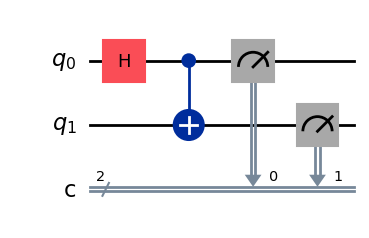

In [18]:
# Create a quantum register with two qubits
q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')

# Create a quantum circuit
qc = QuantumCircuit(q, c)

# Apply a Hadamard gate on the first qubit
qc.h(q[0])

# Apply a CNOT gate with the first qubit as control and the second qubit as target
qc.cx(q[0], q[1])

# Measure the qubits
qc.measure(q, c)

# Draw the circuit
qc.draw(output='mpl')



Question: 
Check the statevector of the circuit to verify that the qubits are in the Bell state.

Now, let's simulate the circuit and check the statevector to verify that the qubits are in the Bell state.

In [19]:
# show the statevector of the circuit
qc.remove_final_measurements()  # no measurements allowed
statevector = Statevector(qc)

# print the statevector
print(statevector)

# print statevector in a table 
statevector_table = statevector.probabilities_dict()
print(statevector_table)


Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
{'00': 0.4999999999999999, '11': 0.4999999999999999}


Now, let is visualize the statevector of the circuit to verify that the qubits are in the Bell state. We will make a plot of the real and imaginary parts of the statevector.

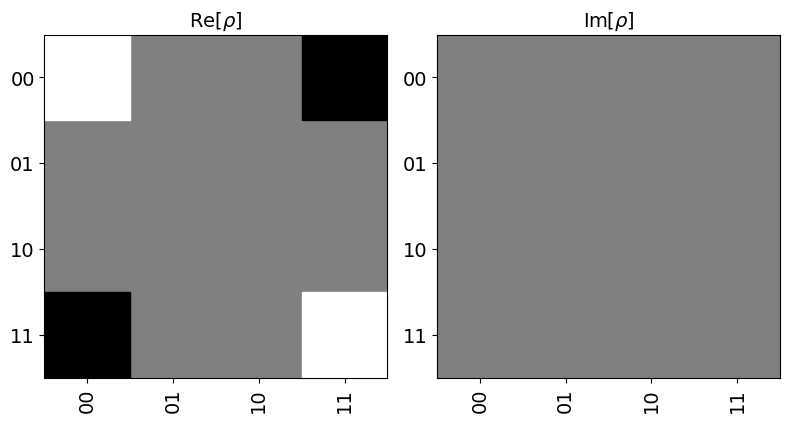

In [20]:
# check the state vector
# print the statevector 
sv=Statevector([1/np.sqrt(2), 0, 0, -1/np.sqrt(2)])
sv.draw(output='hinton')

Make a plot of the statevector on the Bloch sphere to verify that the qubits are in the Bell state from the plot. 

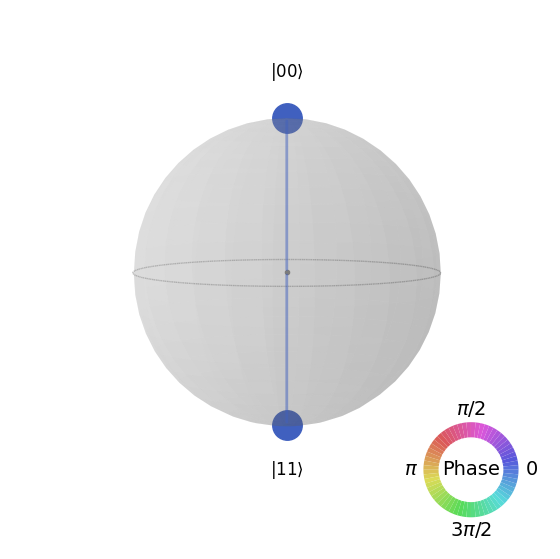

In [21]:
# plot the statevector on the Bloch sphere
plot_state_qsphere(statevector.data)

{'00 00': 527, '11 00': 497}


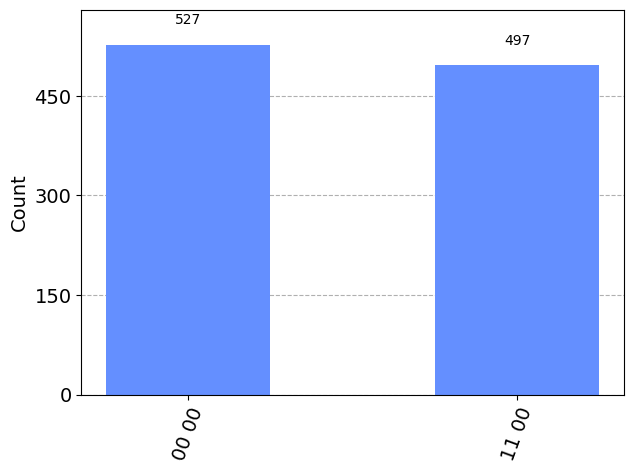

In [22]:
# create the quantum circuit 
qc = QuantumCircuit(q, c)

# Apply a Hadamard gate on the first qubit
qc.h(q[0])

# Apply a CNOT gate with the first qubit as control and the second qubit as target
qc.cx(q[0], q[1])

# measure 
qc.measure_all()

# Simulate the circuit
simulator = BasicSimulator()

result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)

# Draw the circuit
qc.draw(output='mpl')

# make a plot of the counts as a histogram
plot_histogram(counts)



In [23]:

# show the statevector of the circuit
qc.remove_final_measurements()  # no measurements allowed
statevector = Statevector(qc)

# print the statevector
print(statevector)

# print statevector in a table
statevector_table = statevector.probabilities_dict()

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


#### Task 2
Now, change the inputs of the qubits to create the other Bell states and verify that the qubits are in the Bell state.

First, initialize the qubits to the state $|01>$ and then apply the Hadamard gate to the first qubit and the CNOT gate with the first qubit as control and the second qubit as target.

Question: how can we initialize the qubits to the state $|01>$? (discuss with your team and teacher)

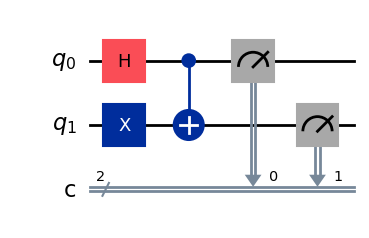

In [24]:
# create a quantum circuit of two qubits
qc = QuantumCircuit(q, c)
#cr = ClassicalRegister(2)

# initialize the qubits to the state |01>
qc.x(q[1])

# Apply a Hadamard gate on the first qubit
qc.h(q[0])

# Apply a CNOT gate with the first qubit as control and the second qubit as target
qc.cx(q[0], q[1])

# measure
qc.measure(q, c)

# Draw the circuit
qc.draw(output='mpl')


Print the statevector of the circuit to verify that the qubits are in the Bell state.

In [25]:

# show the statevector of the circuit
qc.remove_final_measurements()  # no measurements allowed
statevector = Statevector(qc)

# print the statevector
print(statevector)


Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


Make a simulation of the circuit and check the statevector to verify that the qubits are in the Bell state.

{'01': 537, '10': 487}


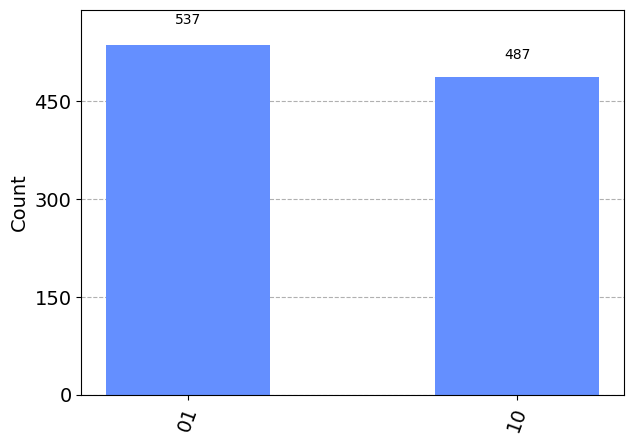

In [26]:
# create a quantum circuit of two qubits
qc = QuantumCircuit(q, c)
#cr = ClassicalRegister(2)

# initialize the qubits to the state |01>
qc.x(q[1])

# Apply a Hadamard gate on the first qubit
qc.h(q[0])

# Apply a CNOT gate with the first qubit as control and the second qubit as target
qc.cx(q[0], q[1])

# measure
qc.measure(q, c)

# Draw the circuit
qc.draw(output='mpl')

simulator = BasicSimulator()

result = simulator.run(qc).result()
counts = result.get_counts()
print(counts)

# make a plot of the counts as a histogram
plot_histogram(counts)

Let's now write a function that creates the Bell state for any input state of the qubits. The function will take the input state of the qubits as an argument and return the circuit that creates the Bell state. But first, let's make a function that initializes the qubits to a particular state.

In [27]:
# create bell pair create_bell_pair(qc, q[0], q[1])
def qubit2_initialization(qc, q_0, q_1):
   if q_0 == 0 and q_1 == 0:
       return qc
   elif q_0 == 1 and q_1 == 0:
         qc.x(0)
         return qc
   elif q_0 == 0 and q_1 == 1:
            qc.x(1)
            return qc
   elif q_0 == 1 and q_1 == 1:
            qc.x(0)
            qc.x(1)
            return qc


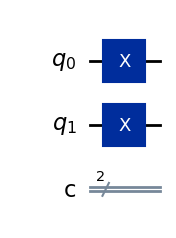

In [28]:
# test the function 
qc = QuantumCircuit(q, c)
qc = qubit2_initialization(qc, 1, 1)

# draw the circuit
qc.draw(output='mpl')

In [29]:

def create_bell_pair(qc, q_0, q_1):
    qc.h(q_0)
    qc.cx(q_0, q_1)
    return qc

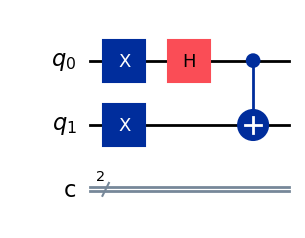

In [30]:
# test the function `create_bell_pair`
qc = QuantumCircuit(q, c)
qc = qubit2_initialization(qc, 1, 1)
qc = create_bell_pair(qc, q[0], q[1])

# draw the circuit
qc.draw(output='mpl')

### Section 2: Quantum teleportation protocol

Let's now implement the quantum teleportation protocol. 
The total number of qubits in the circuit is three. Alice has the first two qubits, and Bob has the third qubit. The first qubit is the state to be teleported, and the second qubit is the entangled qubit shared by Alice and Bob. The third qubit is the qubit that Bob will receive after the teleportation.

First we will create the Bell pair of qubits, and then we will implement the protocol.

In [31]:
# define the function 'create_bell_pair'
def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target

Let's setup the circuit for the quantum teleportation protocol. We will create the Bell pair of qubits and then implement the protocol.

Create a circuit with three qubits and two classical bits. Call the two classical bits `crz` and `crx`. The first qubit is the state to be teleported, the second qubit is the entangled qubit shared by Alice and Bob, and the third qubit is the qubit that Bob will receive after the teleportation.

In [32]:
#### Setup 
# create a quantum circuit of three qubits
qr = QuantumRegister(3, name="q")
# and two classical bits. We will call them crz and crx
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
# create the quantum circuit
teleportation_circuit = QuantumCircuit(qr, crz, crx)

Let's now perform the first step of the protocol by creating the Bell pair of qubits.

Step 1: Create the Bell pair of qubits.

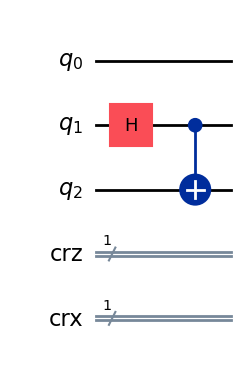

In [33]:
#### Setup 
# create a quantum circuit of three qubits
qr = QuantumRegister(3, name="q")
# and two classical bits. We will call them crz and crx
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
# create the quantum circuit
teleportation_circuit = QuantumCircuit(qr, crz, crx)
create_bell_pair(teleportation_circuit, 1, 2)
# Draw the circuit
teleportation_circuit.draw(output='mpl')


Step 2: Apply the quantum teleportation protocol.


Alice applies a CNOT gate to $q_1$, controlled by $\vert\psi\rangle$ (the qubit she is trying to send Bob). Then Alice applies a Hadamard gate to $|\psi\rangle$. In our quantum circuit, the qubit ($|\psi\rangle$) Alice is trying to send is $q_0$. Develop a function 'alice_gates' that applies the CNOT gate, with the first qubit as the control qubit and the second as the target qubit, and the Hadamard gate to the qubit $q_0$.

In [34]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

Copy, the same code to create the Bell pair of qubits and call the function 'alice_gates' to apply the gates to the qubit $q_0$.

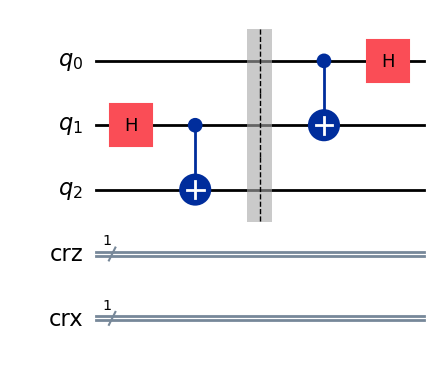

In [35]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw(output='mpl')

In [36]:
def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

Repeat the same steps to create the Bell pair of qubits and apply the gates to the qubit $q_1$. Also, apply the function 

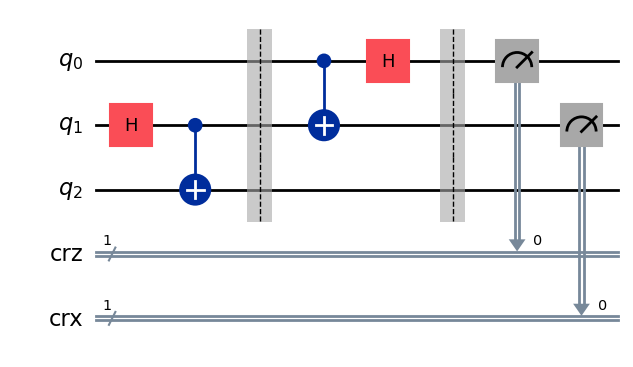

In [37]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)

## STEP 3
measure_and_send(teleportation_circuit, 0 ,1)
teleportation_circuit.draw(output='mpl')

Step 4: Based on the measurement results, Bob applies some gates to his qubit. Develop a function 'bob_gates' that applies the gates to the qubit $q_2$ based on the measurement results. The post processing is as follows:

Depending on the value of `crz` and `crx`, Bob applies the following gates:

00 $\rightarrow$ Do nothing

01 $\rightarrow$ Apply $X$ gate

10 $\rightarrow$ Apply $Z$ gate

11 $\rightarrow$ Apply $ZX$ gate

(*Note that this transfer of information is purely classical*.)

In [38]:
# This function takes a QuantumCircuit (qc), integer (qubit)
# and ClassicalRegisters (crz & crx) to decide which gates to apply
def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    # bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers 
    qc.z(qubit).c_if(crz, 1) # are in the state '1'

In [39]:
# another implementation of the function
def bob_gates2(qc, qubit, crz, crx):
    # In this implementation, we use if statements 
    if crx == 1:
        qc.x(qubit)
    if crz == 1:
        qc.z(qubit)


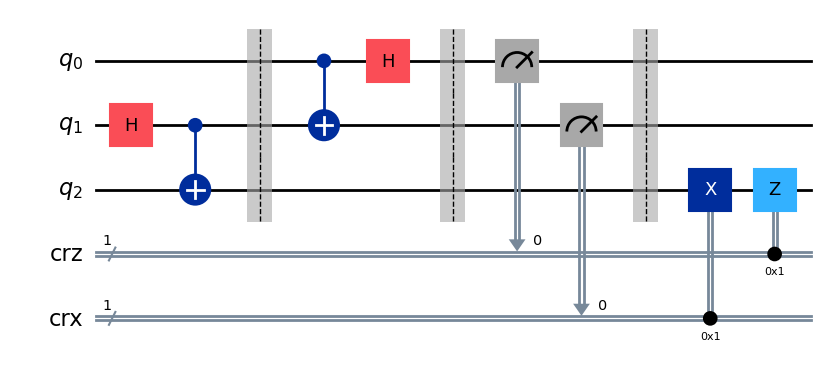

In [40]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)

## STEP 3
measure_and_send(teleportation_circuit, 0, 1)

## STEP 4
teleportation_circuit.barrier() # Use barrier to separate steps
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw(output='mpl')

At the end, 

Eh voila! The quantum teleportation protocol is complete. The state of the qubit $q_0$ has been teleported to the qubit $q_2$. Alice has successfully teleported the state of the qubit $q_0$ to Bob's qubit $q_2$.

Let's now simulate the circuit and check the statevector to verify that the qubit $q_2$ is in the state $|\psi\rangle$.

First, let's initialize the qubit $q_0$ to a random state. Then, we will create the Bell pair of qubits and apply the quantum teleportation protocol. Finally, we will simulate the circuit and check the statevector to verify that the qubit $q_2$ is in the state $|\psi\rangle$.

In the following cell, this is how we create a random state for the qubit $q_0$.

```python
from qiskit import quantum_info

num_qubits = 1 # number of qubit for this random statevector
dims = 2**num_qubits # calculate statevector dimension based on the number of qubits

random_state = quantum_info.random_statevector(dims = dims, seed = None) # One can also specify the random seed for this random statevector

# print the random statevector
print(random_state)
```

In [97]:
from qiskit import quantum_info

num_qubits = 1 # number of qubit for this random statevector
dims = 2**num_qubits # calculate statevector dimension based on the number of qubits

random_state = quantum_info.random_statevector(dims = dims, seed = None) # One can also specify the random seed for this random statevector

# print the random statevector
#print(random_state)

psi = random_state.data

# initialize q_1 in |0>
psi_1 = np.array([1, 0])

# initialize q_2 in |0>
psi_2 = np.array([1, 0])


# print psi
print(psi)

[-0.2497353 +0.13997529j -0.30656517+0.90777585j]


Let's display it in the following cell using the bloch sphere.

<IPython.core.display.Latex object>

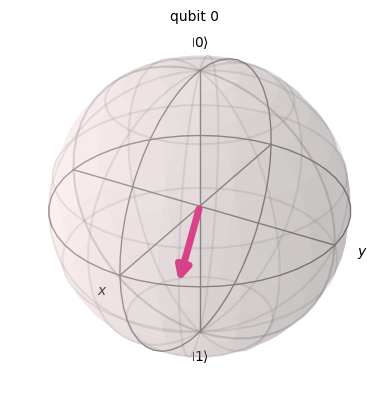

In [42]:
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

# Display it nicely
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
# Show it on a Bloch sphere
plot_bloch_multivector(psi)

Setup the quantum teleportation protocol circuit and simulate the circuit to verify that the qubit $q_2$ is in the state $|\psi\rangle$.

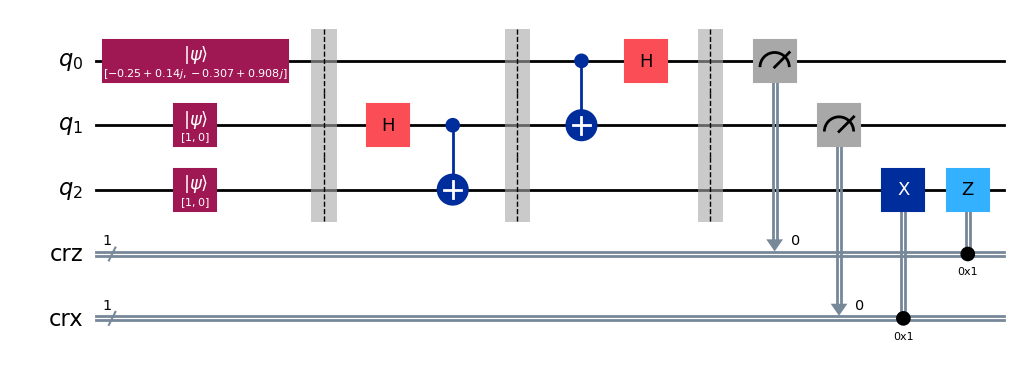

In [98]:
## SETUP
#####################################################################
## Create a quantum circuit with 3 qubits and 2 classical bits
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

# Step 0: Create the random state to be teleported
# Initialize Alice's q0 to |psi>
qc.initialize(psi, 0) # initialize Alice's q0
qc.barrier()

## STEP 1
# Now begins the teleportation protocol, first we create a Bell pair
# between Alice's and Bob's qubits q1 and q2
create_bell_pair(qc, 1, 2)
qc.barrier()

## STEP 2
# Send q1 to Alice and q2 to Bob
alice_gates(qc, 0, 1)

## STEP 3
# Alice then sends her classical bits to Bob
measure_and_send(qc, 0, 1)


## STEP 4
# Bob decodes qubits
bob_gates(qc, 2, crz, crx)

# Draw the circuit
qc.draw(output='mpl')


Initial state vector:


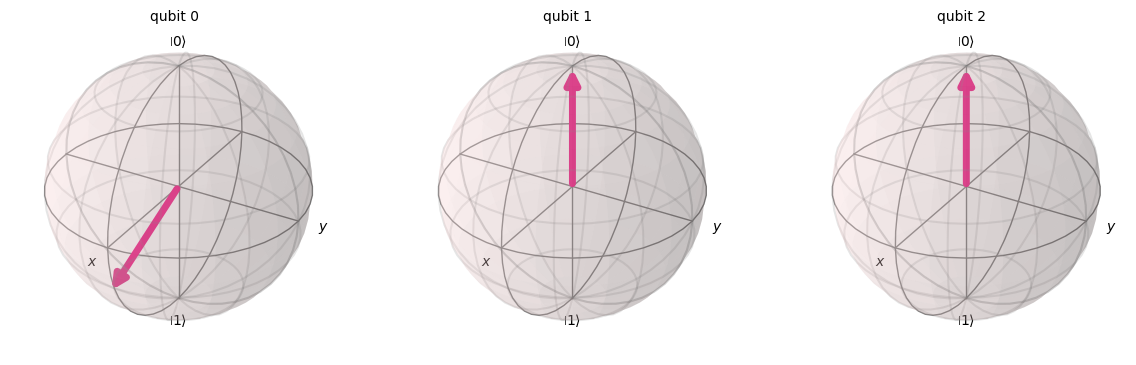

Final state vector:


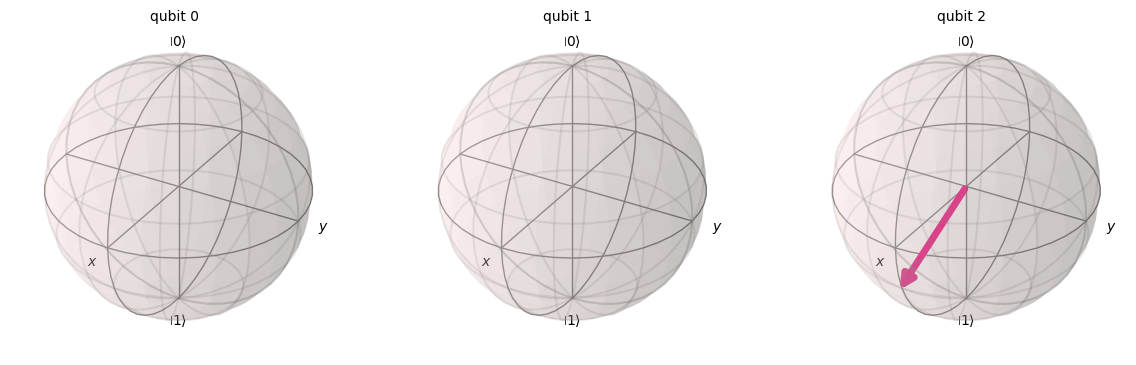

In [104]:
## SETUP the teleportation circuit for simulation
#####################################################################
## Create a quantum circuit with 3 qubits and 2 classical bits
qr = QuantumRegister(3, name="q")   # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical registers
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

# Step 0: Create the random state to be teleported
# Initialize Alice's q0 to |psi>
qc.initialize(psi, 0) # initialize Alice's q0
qc.initialize(psi_1, 1) # initialize Alice's q1
qc.initialize(psi_2, 2) # initialize Alice's q2qc.barrier()

statevector_initial = Statevector(qc)

print("Initial state vector:")

# Plot the initial state in the Bloch sphere
display(statevector_initial.draw('bloch'))

## STEP 1
# Now begins the teleportation protocol, first we create a Bell pair
# between Alice's and Bob's qubits q1 and q2
qc.h(1)
qc.cx(1, 2)
qc.barrier()

## STEP 2
# apply the gates to Alice's qubits
qc.cx(0, 1)
qc.h(0)
qc.barrier()

## STEP 3+4
# hence, the steps 3 and 4 are combined
# Now, we will automate the measurement and the conditional gate application
qc.cz(0, 2)
qc.cx(1, 2)
qc.barrier()

# obtain the statevector 
statevector_final = Statevector(qc)

print("Final state vector:")

# Plot the initial state in the Bloch sphere
display(statevector_final.draw('bloch'))


In [ ]:

job = Sampler().run(qc, shots = trials)
 result = job.result()

# Obtain the counts from the results
statistics = result.quasi_dists[0].binary_probabilities()


# Draw the circuit
qc.draw(output='mpl')


In [ ]:

# print the statevector
statevector = Statevector(qc)
print(statevector)


In [88]:
def state_to_dirac(state):

    # Convert the statevector to dictionary form.
    state_to_dict = state.to_dict()

    return ' '.join('{1:+.4f}|{0}>'.format(key, value)
                      for key, value in state_to_dict.items())


In [91]:
def obtain_vector(qc):

    # Execute the state vector simulation
    resulting_vector = Statevector(qc)

    # Convert the resulting state vector in its Dirac notation
    dirac_vector = state_to_dirac(resulting_vector)

    return resulting_vector, dirac_vector



In [ ]:
def simulate_circuit(qc, trials = 100000):

    # Execute the simulation for the given number of shots
    job = Sampler().run(qc, shots = trials)

    # Collect the results from the job
    result = job.result()

    # Obtain the counts from the results
    statistics = result.quasi_dists[0].binary_probabilities()

    return result, statistics

